In [1]:
import pandas as pd
hr_df = pd.read_csv('hr_data.csv')
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
hr_df.select_dtypes(exclude = ['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [5]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [6]:
len(hr_df)

14999

In [7]:
len(hr_df.columns)

9

In [8]:
hr_df.shape

(14999, 9)

## Loading the Evaluation and Employee Satisfaction Data

In [9]:
emp_satis_eval = pd.read_excel('employee_satisfaction_evaluation.xlsx')
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


## Merge or Join Tables

In [10]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [11]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [12]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Fill in the missing blanks with the average values
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

C:\Users\Chloe\AppData\Local\Temp/ipykernel_27388/238306097.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [14]:
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [15]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [16]:
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [17]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [18]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [19]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [20]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Displaying Your Correlation Matrix

No handles with labels found to put in legend.


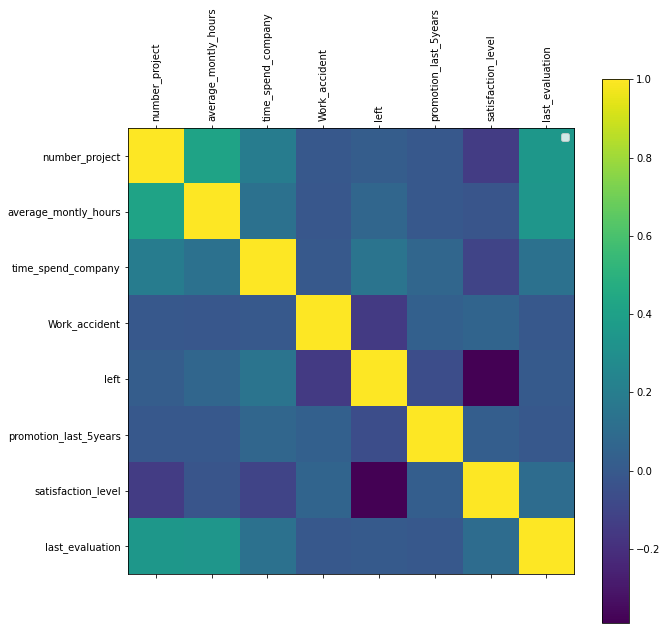

In [21]:
import matplotlib.pyplot as plt
def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_corr(main_df_final)

## Preparing out Dataset for ML

In [22]:
categorical = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [23]:
len(main_df_final.columns)

19

In [24]:
len(main_df_final.loc[main_df_final['left']==1])

3571

In [25]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [26]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

In [27]:
from sklearn.model_selection import train_test_split
X = main_df_final.drop(['left'],axis=1).values
y = main_df_final['left'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.654565,1.373647,0.342551,2.427680,-0.14459,1.432679,-0.503731,-0.232174,-0.232402,-0.229887,-0.207403,-0.24576,-0.252231,-0.614525,-0.421049,2.11180,-0.982906,-0.863574
1,0.969895,-0.806991,-0.342486,-0.411916,-0.14459,-0.052813,1.608311,-0.232174,-0.232402,-0.229887,4.821526,-0.24576,-0.252231,-0.614525,-0.421049,-0.47353,-0.982906,-0.863574
2,-0.654565,-0.786985,-1.027523,-0.411916,-0.14459,0.589562,-0.503731,-0.232174,-0.232402,-0.229887,-0.207403,-0.24576,-0.252231,1.627274,-0.421049,-0.47353,-0.982906,1.157978
3,-0.654565,-0.947032,3.082701,2.427680,-0.14459,1.432679,-1.031741,-0.232174,-0.232402,-0.229887,-0.207403,-0.24576,-0.252231,1.627274,-0.421049,-0.47353,-0.982906,1.157978
4,1.782124,1.053553,1.027589,-0.411916,-0.14459,-2.060236,1.490975,-0.232174,-0.232402,-0.229887,-0.207403,-0.24576,-0.252231,1.627274,-0.421049,-0.47353,-0.982906,1.157978


In [31]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-4.271646e-16,-2.291560e-16,9.074030e-17,-3.743077e-16,5.857883e-16,1.999217e-14,1.402720e-14,-9.114425e-16,-1.426614e-16,2.401218e-16,-1.022301e-15,-1.078653e-15,-7.095107e-16,-2.179205e-16,6.040294e-16,8.529123e-16,7.986330e-16,-6.739590e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.466795e+00,-2.107371e+00,-1.027523e+00,-4.119159e-01,-1.445900e-01,-2.100384e+00,-2.087762e+00,-2.321742e-01,-2.324019e-01,-2.298869e-01,-2.074032e-01,-2.457599e-01,-2.522315e-01,-6.145248e-01,-4.210486e-01,-4.735297e-01,-9.829063e-01,-8.635739e-01
25%,-6.545648e-01,-9.070203e-01,-3.424861e-01,-4.119159e-01,-1.445900e-01,-6.951886e-01,-9.144056e-01,-2.321742e-01,-2.324019e-01,-2.298869e-01,-2.074032e-01,-2.457599e-01,-2.522315e-01,-6.145248e-01,-4.210486e-01,-4.735297e-01,-9.829063e-01,-8.635739e-01
50%,1.576649e-01,-6.756906e-03,-3.424861e-01,-4.119159e-01,-1.445900e-01,1.077804e-01,2.427948e-02,-2.321742e-01,-2.324019e-01,-2.298869e-01,-2.074032e-01,-2.457599e-01,-2.522315e-01,-6.145248e-01,-4.210486e-01,-4.735297e-01,-9.829063e-01,-8.635739e-01
75%,9.698947e-01,8.735006e-01,3.425513e-01,-4.119159e-01,-1.445900e-01,8.304525e-01,9.042968e-01,-2.321742e-01,-2.324019e-01,-2.298869e-01,-2.074032e-01,-2.457599e-01,-2.522315e-01,1.627274e+00,-4.210486e-01,-4.735297e-01,1.017391e+00,1.157978e+00
max,2.594354e+00,2.173881e+00,4.452776e+00,2.427680e+00,6.916109e+00,1.553125e+00,1.666978e+00,4.307112e+00,4.302891e+00,4.349966e+00,4.821526e+00,4.069012e+00,3.964613e+00,1.627274e+00,2.375023e+00,2.111800e+00,1.017391e+00,1.157978e+00


## Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Accuracy {0:.2f}%'.format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.02%
[[3172  243]
 [ 701  384]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3415
           1       0.61      0.35      0.45      1085

    accuracy                           0.79      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



## Random Forest Classifer

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test,y_test)

print('Accuracy {0:.2f}%'.format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy 98.96%
[[3410    5]
 [  42 1043]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3415
           1       1.00      0.96      0.98      1085

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [34]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [35]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [36]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns = ['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
5,0.309060
0,0.186372
2,0.185025
1,0.148321
6,0.127761
16,0.008771
3,0.008752
15,0.004059
17,0.003815
13,0.003433


In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Training the Classifier
batch_size = 10
epochs = 25
history = model.fit(X_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.4330 - accuracy: 0.7958 - val_loss: 0.3117 - val_accuracy: 0.8293
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2721 - accuracy: 0.8497 - val_loss: 0.2453 - val_accuracy: 0.8553
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2270 - accuracy: 0.9140 - val_loss: 0.2156 - val_accuracy: 0.9442
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2052 - accuracy: 0.9476 - val_loss: 0.1998 - val_accuracy: 0.9471
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1922 - accuracy: 0.9507 - val_loss: 0.1910 - val_accuracy: 0.9509
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1837 - accuracy: 0.9522 - val_loss: 0.1850 - val_accuracy: 0.9511
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1780 - accuracy: 0.9532 - val_loss: 0.1807 - val_accuracy:

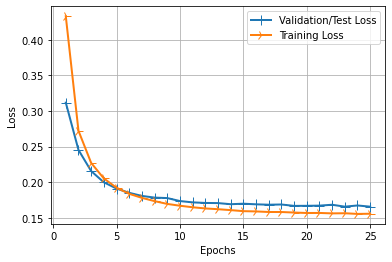

In [40]:
# Plotting loss charts
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

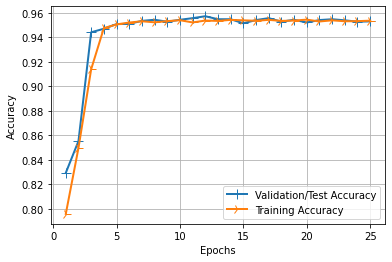

In [41]:
# import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [42]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 583us/step
[[3309  106]
 [ 105  980]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3415
           1       0.90      0.90      0.90      1085

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



## Let's a Deeper Model

In [43]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 3
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 90)                16290     
                                                                 
 dense_5 (Dense)             (None, 1)                 91        
                                                                 
Total params: 70,291
Trainable params: 70,291
Non-trai

In [44]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training the Deeper Model

In [46]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2784 - accuracy: 0.9397 - val_loss: 0.2838 - val_accuracy: 0.9418
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2613 - accuracy: 0.9433 - val_loss: 0.2443 - val_accuracy: 0.9482
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2542 - accuracy: 0.9421 - val_loss: 0.2426 - val_accuracy: 0.9511
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2450 - accuracy: 0.9463 - val_loss: 0.2342 - val_accuracy: 0.9498
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2449 - accuracy: 0.9440 - val_loss: 0.2354 - val_accuracy: 0.9509
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2399 - accuracy: 0.9460 - val_loss: 0.2311 - val_accuracy: 0.9500
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2372 - accuracy: 0.9477 - val_loss: 0.2220 - val_accuracy:

In [47]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 1ms/step
[[3332   83]
 [ 111  974]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3415
           1       0.92      0.90      0.91      1085

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

